In [ ]:
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
X_train.shape

(55000, 28, 28)

In [ ]:
X_train.dtype

dtype('uint8')

In [ ]:
X_train,X_valid,X_test = X_train/255.,X_valid/255.,X_test/255.

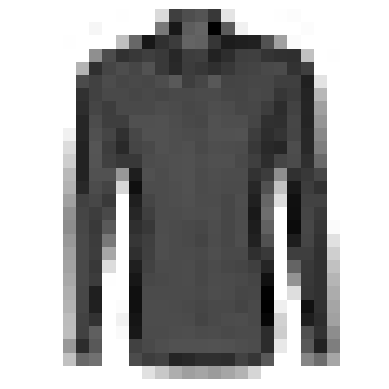

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(X_train[40], cmap = 'binary')
plt.axis('off')
plt.show()

In [ ]:
y_train

array([9, 0, 0, ..., 9, 0, 2], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]

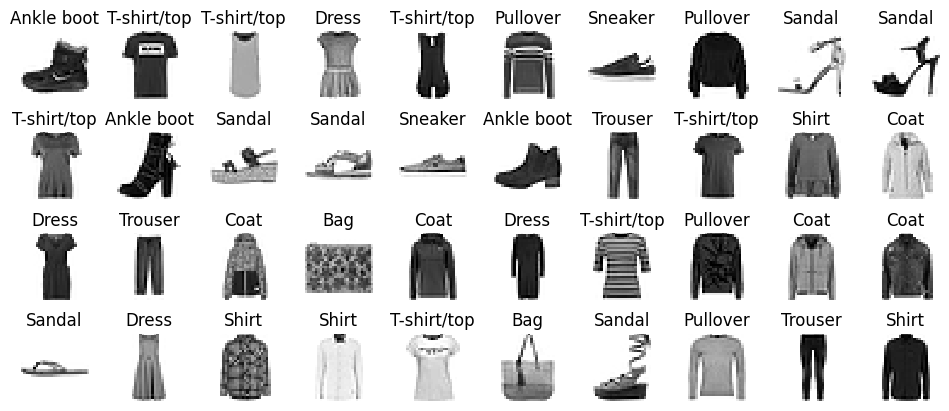

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize = (n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row +col
        plt.subplot(n_rows, n_cols, index +1)
        plt.imshow(X_train[index], cmap = "binary", interpolation = "nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace = 0.2, hspace = 0.5)

plt.show()

#Tenserflow Sequential API

In [ ]:
 tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape = [28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))



In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

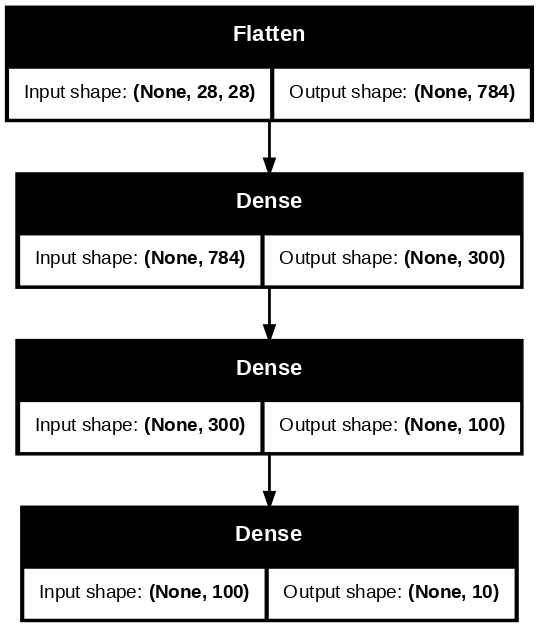

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True,dpi = 100)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = [28,28]),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, activation = 'relu'),
    tf.keras.layers.Dense(100, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

In [ ]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
model.get_layer('dense') is hidden1

True

In [ ]:
weights, biases = hidden1.get_weights()
weights

array([[ 1.10488385e-02, -3.54531966e-02,  3.23443562e-02, ...,
        -5.49851470e-02, -3.21008489e-02, -2.04738118e-02],
       [-2.48389207e-02,  6.91287667e-02, -2.84298509e-03, ...,
         5.38743734e-02,  5.15390038e-02,  5.78198582e-02],
       [-2.19748244e-02,  2.33643875e-02,  1.05715841e-02, ...,
        -7.05835670e-02, -1.91204846e-02,  2.71259323e-02],
       ...,
       [-8.30739737e-03,  4.88952473e-02,  4.89888638e-02, ...,
         1.78091228e-03,  2.65980363e-02, -6.85400069e-02],
       [-6.32723123e-02,  2.34194100e-02,  8.26567411e-05, ...,
        -6.47219494e-02,  1.47818401e-02, -5.98972030e-02],
       [ 6.49535358e-02,  4.00897637e-02, -2.14693844e-02, ...,
        -1.65364332e-02,  2.03340575e-02,  6.54587299e-02]], dtype=float32)

#Compiling the model

In [ ]:
model.compile(
    loss = 'sparse_categorical_crossentropy',
    optimizer = 'sgd',
    metrics = ['acurracy']

)

In [ ]:
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = tf.keras.optimizers.SGD(),
    metrics = [tf.keras.metrics.sparse_categorical_accuracy]
)

In [ ]:
tf.keras.utils.to_categorical([0,5,1,0], num_classes =10)

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [ ]:
import numpy as np

np.argmax(
       [[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],
       axis = 1

)

array([0, 5, 1, 0])

#Training and Evaluating the mode

In [ ]:
history = model.fit(X_train, y_train, epochs = 30, validation_data = (X_valid, y_valid))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 1.0024 - sparse_categorical_accuracy: 0.6861 - val_loss: 0.5065 - val_sparse_categorical_accuracy: 0.8264
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.5035 - sparse_categorical_accuracy: 0.8286 - val_loss: 0.4577 - val_sparse_categorical_accuracy: 0.8376
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 0.4504 - sparse_categorical_accuracy: 0.8445 - val_loss: 0.4369 - val_sparse_categorical_accuracy: 0.8440
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 0.4205 - sparse_categorical_accuracy: 0.8540 - val_loss: 0.4223 - val_sparse_categorical_accuracy: 0.8488
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - loss: 0.3994 - sparse_categorical_accuracy: 0.8608 - val_loss: 0.4089 - val_sparse_categorical_accuracy: 0.8544
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3826 - sparse_categorical_accuracy: 0.8663 - val_loss: 0.4005 - val_sparse_categorical_accura

In [ ]:
1719*32

55008

In [ ]:
history.history

{'loss': [0.7179470658302307,
  0.48472678661346436,
  0.4399551749229431,
  0.4129236936569214,
  0.3932942748069763,
  0.3775482177734375,
  0.36429011821746826,
  0.35263824462890625,
  0.3422040343284607,
  0.33272141218185425,
  0.32416096329689026,
  0.31620755791664124,
  0.30879098176956177,
  0.3019025921821594,
  0.2952860891819,
  0.2890765368938446,
  0.2830032706260681,
  0.2774409353733063,
  0.2719467580318451,
  0.2668074667453766,
  0.26187774538993835,
  0.25697940587997437,
  0.2524346113204956,
  0.24791976809501648,
  0.24359068274497986,
  0.23927561938762665,
  0.23520641028881073,
  0.23114730417728424,
  0.22726720571517944,
  0.22337177395820618],
 'sparse_categorical_accuracy': [0.7667090892791748,
  0.8327272534370422,
  0.8468000292778015,
  0.8555999994277954,
  0.8623818159103394,
  0.8670908808708191,
  0.8715272545814514,
  0.8754545450210571,
  0.8789272904396057,
  0.881709098815918,
  0.884181797504425,
  0.8868727087974548,
  0.8892182111740112,
  0

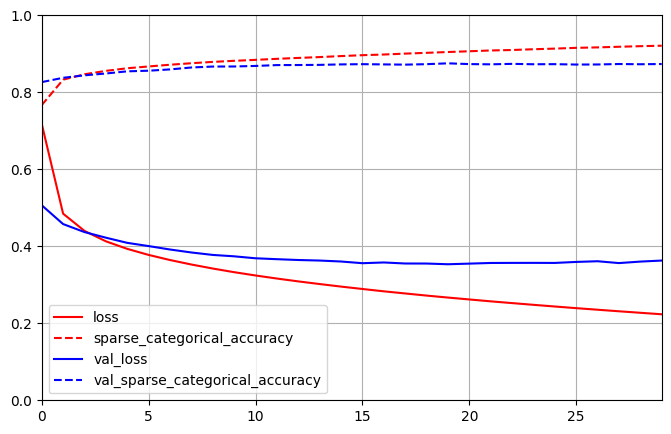

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize = (8,5), grid = True, xlim = [0,29], ylim = [0,1], label = True,
                                   style = ['r-','r--','b-','b--'])
plt.legend() #seklin overfit olmagi

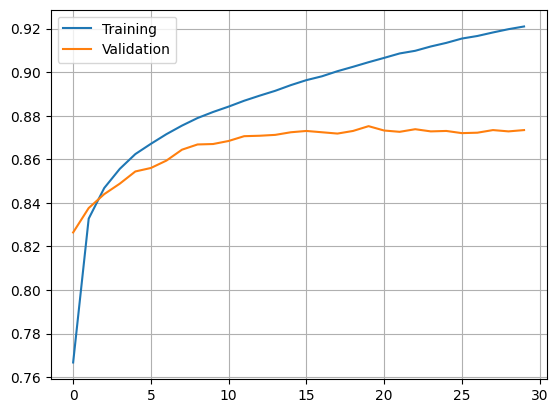

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'], label = 'Training')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'Validation')
plt.legend()
plt.grid()
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3739 - sparse_categorical_accuracy: 0.8710


[0.3762732744216919, 0.8698999881744385]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.18, 0.  , 0.  , 0.  , 0.81],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
#output layer class sayi =

In [ ]:
y_pred = np.argmax(y_proba, axis = 1)
y_pred

array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred] #adlari gormek ucun

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
class_names[5]

'Sandal'

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

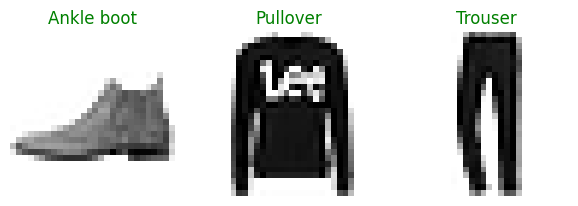

In [ ]:
plt.figure(figsize = (7.2, 2.4))

for index, image in enumerate(X_new):
    plt.subplot(1,3, index+1)
    plt.imshow(image, cmap = 'binary', interpolation = 'nearest')
    plt.axis('off')
    plt.title(class_names[y_new[index]], fontsize = 12,
              color = 'g' if y_pred[index] == y_new[index] else 'r')
plt.subplots_adjust(wspace  = 0.2, hspace = 0.5)
plt.show()

#Regression with MLP

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state = 42)
X_train, X_valid, y_train, y_valid =train_test_split(
    X_train_full, y_train_full, random_state =42
)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

norm_layer = tf.keras.layers.Normalization()

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape = X_train.shape[1:]),
    norm_layer,
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(30, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'linear')
])

norm_layer.adapt(X_train)
optimizer = tf.keras.optimizers.Adam()
model.compile(loss = 'mse',optimizer = optimizer, metrics = ['RootMeanSquaredError'])
history = model.fit(X_train, y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.2959 - loss: 1.7584 - val_RootMeanSquaredError: 0.8765 - val_loss: 0.7682
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6944 - loss: 0.4834 - val_RootMeanSquaredError: 0.6622 - val_loss: 0.4385
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6310 - loss: 0.3984 - val_RootMeanSquaredError: 0.6224 - val_loss: 0.3874
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6116 - loss: 0.3742 - val_RootMeanSquaredError: 0.5892 - val_loss: 0.3472
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6031 - loss: 0.3640 - val_RootMeanSquaredError: 0.6344 - val_loss: 0.4025
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.5953 - loss: 0.3546 - val_RootMeanSquaredError: 0.7069 - val_loss: 0.4996
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5903 - los

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 30)                  │             270 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 30)                  │             930 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,712 (14.51 KB)

 Trainable params: 1,231 (4.81 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 2,464 (9.63 KB)

#Functioal API

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

In [ ]:
normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation = 'relu')
hidden_layer2 = tf.keras.layers.Dense(30, activation = 'relu')
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape = [8])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)
model = tf.keras.Model(inputs = [input_], outputs = [output])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 8)              │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 8)              │             17 │ input_layer[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 30)             │            270 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 30)             │            930 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

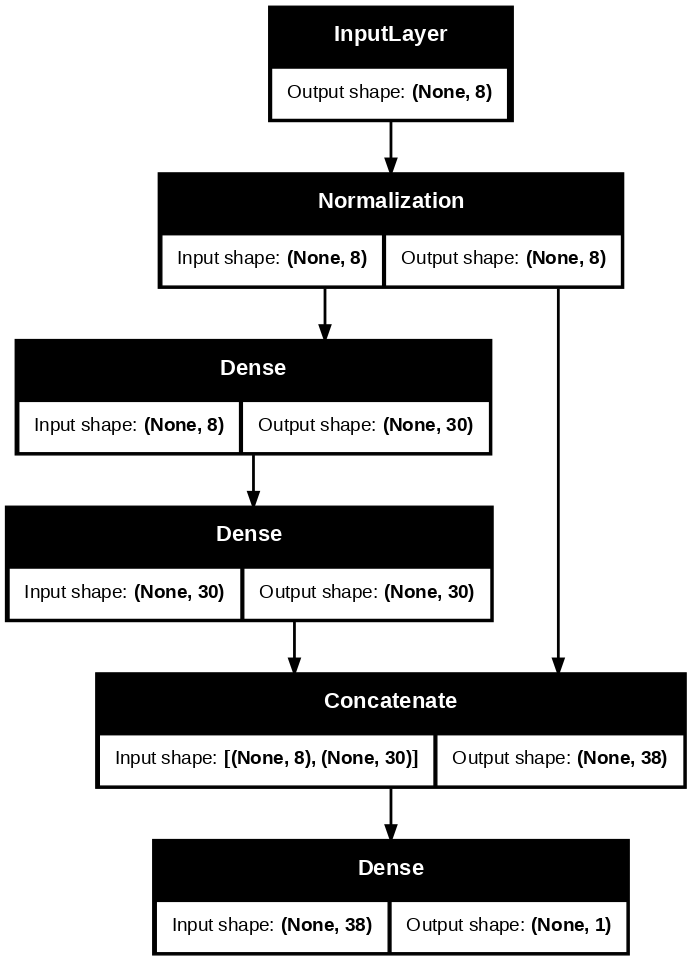

In [ ]:
tf.keras.utils.plot_model(model,show_shapes = True, dpi = 100)

In [ ]:
normalization_layer.adapt(X_train)

model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['RootMeanSquaredError'])
history = model.fit(X_train,y_train, epochs = 20, validation_data = (X_valid, y_valid))

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 8))
  warnings.warn(msg)


363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 1.0978 - loss: 1.2802 - val_RootMeanSquaredError: 3.4838 - val_loss: 12.1366
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7221 - loss: 0.5222 - val_RootMeanSquaredError: 4.0311 - val_loss: 16.2496
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - RootMeanSquaredError: 0.6953 - loss: 0.4839 - val_RootMeanSquaredError: 0.6968 - val_loss: 0.4856
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6657 - loss: 0.4437 - val_RootMeanSquaredError: 6.6312 - val_loss: 43.9725
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 0.7418 - loss: 0.5567 - val_RootMeanSquaredError: 6.0006 - val_loss: 36.0073
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7181 - loss: 0.5230 - val_RootMeanSquaredError: 6.7853 - val_loss: 46.0404
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7261 - loss: 0.5

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
outputs = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs = [input_wide, input_deep],
                      outputs = [outputs])

In [ ]:
model.compile(loss = 'mse',
              optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3),
              metrics = ["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)

history = model.fit((X_train_wide, X_train_deep), y_train, epochs = 20,
                    validation_data = ((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))


Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 1.8766 - loss: 3.6371 - val_RootMeanSquaredError: 1.0086 - val_loss: 1.0173
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.8158 - loss: 0.6674 - val_RootMeanSquaredError: 0.7131 - val_loss: 0.5085
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.7023 - loss: 0.4935 - val_RootMeanSquaredError: 0.6604 - val_loss: 0.4361
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6648 - loss: 0.4421 - val_RootMeanSquaredError: 0.6564 - val_loss: 0.4308
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6400 - loss: 0.4097 - val_RootMeanSquaredError: 0.6139 - val_loss: 0.3769
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.6225 - loss: 0.3877 - val_RootMeanSquaredError: 0.5889 - val_loss: 0.3468
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - RootMeanSquaredError: 0.6111 - los

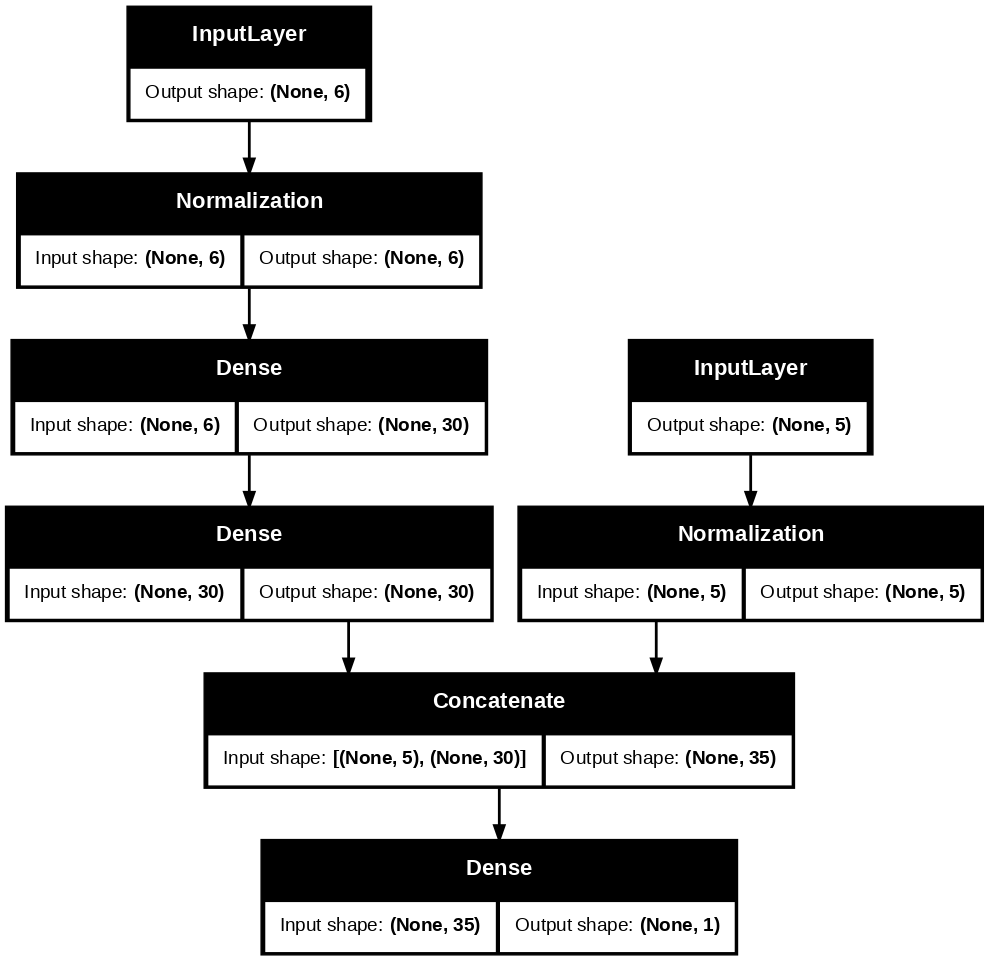

In [ ]:
tf.keras.utils.plot_model(model, show_shapes = True, dpi = 100)

In [ ]:
tf.random.set_seed(42)
tf.keras.backend.clear_session()

In [ ]:
input_wide = tf.keras.layers.Input(shape = [5])
input_deep = tf.keras.layers.Input(shape = [6])

norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()

norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)

hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)

concat = tf.keras.layers.concatenate([norm_wide, hidden2])

output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)

model = tf.keras.Model(inputs = [input_wide, input_deep],
                            outputs = [output, aux_output])

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = ("mse","mse"), loss_weights = (0.9,0.1),optimizer = optimizer,
              metrics = ["RootMeanSquaredError","RootMeanSquaredError"])

In [ ]:
norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train),epochs=20,
    validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid))
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - dense_2_RootMeanSquaredError: 1.5310 - dense_2_loss: 2.4647 - dense_3_RootMeanSquaredError: 1.7751 - dense_3_loss: 3.2789 - loss: 2.5461 - val_dense_2_RootMeanSquaredError: 0.7708 - val_dense_2_loss: 0.5939 - val_dense_3_RootMeanSquaredError: 1.4410 - val_dense_3_loss: 2.0756 - val_loss: 0.7423
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - dense_2_RootMeanSquaredError: 0.7270 - dense_2_loss: 0.5296 - dense_3_RootMeanSquaredError: 0.8561 - dense_3_loss: 0.7337 - loss: 0.5500 - val_dense_2_RootMeanSquaredError: 0.6525 - val_dense_2_loss: 0.4257 - val_dense_3_RootMeanSquaredError: 0.9914 - val_dense_3_loss: 0.9825 - val_loss: 0.4815
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - dense_2_RootMeanSquaredError: 0.6639 - dense_2_loss: 0.4411 - dense_3_RootMeanSquaredError: 0.7796 - dense_3_loss: 0.6080 - loss: 0.4578 - val_dense_2_RootMeanSquaredError: 0.6204 - val_dense_2_loss: 0.3848 - val_dense_3_RootMeanSquaredError: 0.8

# Using the Subclassing API to build Dynamic Models

In [ ]:
@tf.keras.utils.register_keras_serializable()
class WideAndDeepModel(tf.keras.Model):
    def __init__(self,units = 30, activation = 'relu', **kwargs):
        super().__init__(**kwargs)
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation = activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation = activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)

    def call(self,inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide,hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output
tf.random.set_seed(42)
model = WideAndDeepModel(30, activation = 'relu', name = 'my_cool_model')

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 1e-3)
model.compile(loss = ['mse', 'mse'], loss_weights = [0.9,0.1], optimizer = optimizer,
              metrics = ["RootMeanSquaredError","RootMeanSquaredError"])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep),(y_train,y_train), epochs = 10,
    validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep),(y_test,y_test))
y_pred_main,y_pred_aux = model.predict((X_new_wide,X_new_deep))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - RootMeanSquaredError: 1.5243 - RootMeanSquaredError_1: 1.8102 - loss: 2.5102 - mse_loss: 3.3403 - val_RootMeanSquaredError: 0.8921 - val_RootMeanSquaredError_1: 2.5707 - val_loss: 1.3771 - val_mse_loss: 6.6053
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.7480 - RootMeanSquaredError_1: 1.0075 - loss: 0.6058 - mse_loss: 1.0167 - val_RootMeanSquaredError: 1.0203 - val_RootMeanSquaredError_1: 1.2954 - val_loss: 1.1047 - val_mse_loss: 1.6774
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - RootMeanSquaredError: 0.6856 - RootMeanSquaredError_1: 0.8348 - loss: 0.4929 - mse_loss: 0.6972 - val_RootMeanSquaredError: 1.0752 - val_RootMeanSquaredError_1: 1.4247 - val_loss: 1.2434 - val_mse_loss: 2.0291
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.6580 - RootMeanSquaredError_1: 0.7847 - loss: 0.4514 - mse_loss: 0.6159 - val_RootMeanSquaredError: 1.0380 - val_RootMeanSquaredEr

# Saving and Restoring a Model

In [ ]:
import shutil

shutil.rmtree('my_keras_model.keras',ignore_errors = True)

In [ ]:
model.save('my_keras_model.keras')

In [ ]:
model = tf.keras.models.load_model("/content/my_keras_model.keras")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step


#Using Callbacks

In [ ]:
import shutil

shutil.rmtree("my_checkpoints", ignore_errors = True)

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints.keras',
                                                   save_weights_only = False,
                                                   save_best_only = True,
                                                   save_freq ='epoch')
history = model.fit(
    (X_train_wide, X_train_deep), (y_train,y_train), epochs = 10,
    validation_data = ((X_valid_wide, X_valid_deep),(y_valid,y_valid)),
    callbacks = [checkpoint_cb]
)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - RootMeanSquaredError: 0.5991 - RootMeanSquaredError_1: 0.6597 - loss: 0.3667 - mse_loss: 0.4354 - val_RootMeanSquaredError: 1.0391 - val_RootMeanSquaredError_1: 0.7635 - val_loss: 1.0300 - val_mse_loss: 0.5827
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5953 - RootMeanSquaredError_1: 0.6536 - loss: 0.3617 - mse_loss: 0.4274 - val_RootMeanSquaredError: 0.8781 - val_RootMeanSquaredError_1: 0.6928 - val_loss: 0.7419 - val_mse_loss: 0.4799
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5908 - RootMeanSquaredError_1: 0.6476 - loss: 0.3561 - mse_loss: 0.4195 - val_RootMeanSquaredError: 0.8356 - val_RootMeanSquaredError_1: 0.7612 - val_loss: 0.6864 - val_mse_loss: 0.5792
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5877 - RootMeanSquaredError_1: 0.6447 - loss: 0.3525 - mse_loss: 0.4158 - val_RootMeanSquaredError: 0.8242 - val_RootMeanSquaredEr

In [ ]:
checkpoint_cb = tf.keras.callbacks.EarlyStopping(patience = 10,
                                                 restore_best_weights = True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train,y_train), epochs = 100,
    validation_data = ((X_valid_wide, X_valid_deep),(y_valid,y_valid)),
    callbacks = [checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5735 - RootMeanSquaredError_1: 0.6253 - loss: 0.3351 - mse_loss: 0.3911 - val_RootMeanSquaredError: 0.6001 - val_RootMeanSquaredError_1: 0.6801 - val_loss: 0.3704 - val_mse_loss: 0.4625
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - RootMeanSquaredError: 0.5722 - RootMeanSquaredError_1: 0.6231 - loss: 0.3335 - mse_loss: 0.3884 - val_RootMeanSquaredError: 0.6184 - val_RootMeanSquaredError_1: 0.7060 - val_loss: 0.3940 - val_mse_loss: 0.4983
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5705 - RootMeanSquaredError_1: 0.6212 - loss: 0.3316 - mse_loss: 0.3860 - val_RootMeanSquaredError: 0.6199 - val_RootMeanSquaredError_1: 0.7373 - val_loss: 0.4002 - val_mse_loss: 0.5435
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - RootMeanSquaredError: 0.5696 - RootMeanSquaredError_1: 0.6197 - loss: 0.3305 - mse_loss: 0.3841 - val_RootMeanSquaredError: 0.7969 - val_RootMeanSquar

In [ ]:
class PrintTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        ratio = logs["val_loss"]/logs["loss"]
        print(f"Epoch = {epoch}, val/train = {ratio:.2f}")

In [ ]:
val_train_ratio_cb = PrintTrainRatioCallback()
history = model.fit(
    (X_train_wide,X_train_deep),(y_train,y_train), epochs = 10,
    validation_data = ((X_valid_wide,X_valid_deep),(y_valid,y_valid)),
    callbacks = [val_train_ratio_cb],verbose = 0)

Epoch = 0, val/train = 1.22
Epoch = 1, val/train = 1.47
Epoch = 2, val/train = 2.12
Epoch = 3, val/train = 3.44
Epoch = 4, val/train = 4.24
Epoch = 5, val/train = 3.18
Epoch = 6, val/train = 2.85
Epoch = 7, val/train = 2.12
Epoch = 8, val/train = 2.24
Epoch = 9, val/train = 1.95
